In [1]:
# import packages
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
import pandas as pd

# Question-2

In [2]:
boston_regression = pd.read_csv("data/boston_reg.csv")
boston_regression

,lstat,medv
0,22.74,8.4
1,24.39,8.3
2,29.68,8.1
3,22.11,10.5
4,23.60,11.3
5,25.68,9.7
6,24.16,14.0
7,26.82,13.4
8,26.40,17.2
9,23.09,20.0


In [3]:
boston_regression.columns

Index(['lstat', 'medv'], dtype='object')

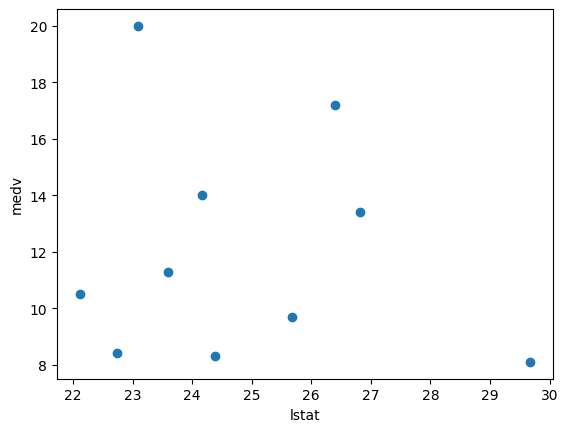

In [4]:
plt.xlabel("lstat")
plt.ylabel("medv")
plt.scatter(x=boston_regression.lstat, y=boston_regression.medv)

# part (a) and (b)

In [5]:
# fitting KNN regression model to estimate medv for a given lstat value.
X = boston_regression.lstat.to_numpy()
X.resize((10, 1))
y = boston_regression.medv.to_numpy()
# creating two KNN regression models with number of nearest neighbours equals 1 and 5
knn_reg_1 = KNeighborsRegressor(n_neighbors=1)
knn_reg_5 = KNeighborsRegressor(n_neighbors=5)
knn_reg_1.fit(X, y)
knn_reg_5.fit(X, y)

KNeighborsRegressor()

In [6]:
# prediction for sample points 25 and 27 using the k=1 and k=5 KNN.
knn_reg_1.predict([[25]]), knn_reg_5.predict([[25]]), knn_reg_1.predict([[27]]), knn_reg_5.predict([[27]])

(array([8.3]), array([12.1]), array([13.4]), array([11.34]))

In [7]:
boston_classification = pd.read_csv("data/boston_class.csv")
boston_classification

,lstat,medv_cat
0,22.74,0
1,24.39,0
2,29.68,0
3,22.11,1
4,23.60,1
5,25.68,0
6,24.16,2
7,26.82,1
8,26.40,2
9,23.09,2


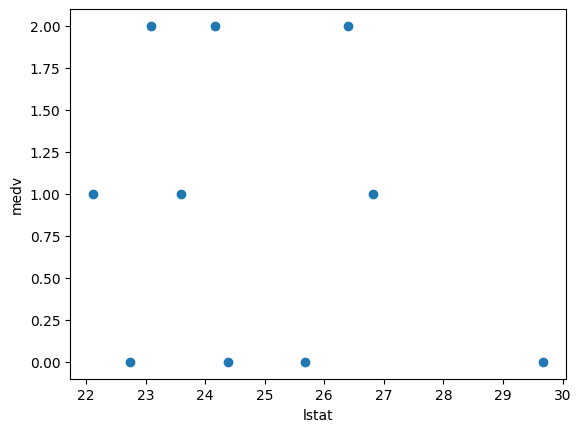

In [8]:
plt.xlabel("lstat")
plt.ylabel("medv")
plt.scatter(x=boston_classification.lstat, y=boston_classification.medv_cat)

# part(c) and (d)

In [10]:
# fitting KNN regression model to estimate medv for a given lstat value.
X = boston_classification.lstat.to_numpy()
X.resize((10, 1))
y = boston_classification.medv_cat.to_numpy()
# creating two KNN regression models with number of nearest neighbours equals 1 and 5
knn_cl_1 = KNeighborsClassifier(n_neighbors=1)
knn_cl_5 = KNeighborsClassifier(n_neighbors=5)
knn_cl_1.fit(X, y)
knn_cl_5.fit(X, y)

KNeighborsClassifier()

In [11]:
knn_cl_1.predict([[25]]), knn_cl_5.predict([[25]]), knn_cl_1.predict([[27]]), knn_cl_5.predict([[27]])

(array([0]), array([0]), array([1]), array([0]))

# Question-3

# part (a)

In [12]:
def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3
def get_sim_data(f, sample_size=100, std=0.01):
    x = np.random.uniform(0, 1, sample_size)
    y = f(x) + np.random.normal(0, std, sample_size)
    df = pd.DataFrame({"x": x,"y": y})
    return df

In [13]:
# generating sample data using f(x)
sample_data = get_sim_data(f)
sample_data

,x,y
0,0.162939,0.003732
1,0.126666,0.009395
2,0.148690,-0.007364
3,0.411449,0.023148
4,0.019690,-0.000145
...,...,...
95,0.092702,-0.006264
96,0.102709,-0.001527
97,0.536687,0.048213
98,0.073191,-0.001749


# part (b) and part (c)

In [ ]:
# set of models
# step 1 - Fitting polynomial models of degree 0 to 15 with the randomly generated 100 data points.
# step 2 - Predicting the result for x_0
model_pred = []
x_0 = 0.18
for i in range(0, 16):
    model = PolynomialFeatures(degree=i)
    x_poly = model.fit_transform(sample_data[['x']])
    linear_model = LinearRegression()
    linear_model.fit(x_poly, sample_data['y'])

    coefficients = linear_model.coef_
    intercept = linear_model.intercept_
    out = intercept
    for idx, j in enumerate(coefficients):
        out += j * (x_0**idx)
    model_pred.append(out)

model_pred

# part (d) - Repeating steps (a) - (c) 250 times

In [42]:
mul_runs = {}
x_0 = 0.18
y_0 = f(0.18) + np.random.normal(0, 0.01)
# running the above experiment 250 times
for run in range(250):
    # generating random data
    sample_data = get_sim_data(f)
    model_pred = []
    # fitting polynomial models of degree 0-15 and predicting x_0.
    for i in range(0, 16):
        model = PolynomialFeatures(degree=i)
        x_poly = model.fit_transform(sample_data[['x']])
        linear_model = LinearRegression()
        linear_model.fit(x_poly, sample_data['y'])
        model_pred.append(linear_model.predict(model.transform([[x_0]]))[0])
    mul_runs[run] = model_pred

/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with f

In [43]:
output = pd.DataFrame(mul_runs).T
output

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.015880,0.011083,0.009338,0.003758,0.002933,0.002485,0.002294,0.003754,0.003926,0.004062,0.003803,0.004645,0.005439,0.005496,0.007922,0.006898
1,0.016781,0.011932,0.010478,0.005865,0.002389,0.004750,0.004813,0.005691,0.004640,0.003810,0.003641,0.003750,0.004616,0.004445,0.003542,0.003944
2,0.017538,0.013340,0.011375,0.007859,0.006500,0.006554,0.006761,0.007456,0.008692,0.008801,0.010646,0.014858,0.015131,0.015053,0.017129,0.017384
3,0.016457,0.011750,0.010380,0.005896,0.005529,0.007182,0.007271,0.006331,0.006328,0.006164,0.006502,0.005196,0.005320,0.005314,0.003534,0.004169
4,0.014701,0.011095,0.010377,0.004114,0.000281,0.001226,0.001200,0.000714,-0.000927,-0.000817,-0.000772,-0.000561,0.002825,0.003102,0.003247,0.005396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.015238,0.014381,0.010457,0.007102,0.004361,0.006175,0.006265,0.005762,0.006911,0.007932,0.007375,0.008482,0.007069,0.006902,0.008208,0.008939
246,0.016096,0.013085,0.009405,0.007594,0.003176,0.005542,0.005483,0.005972,0.006878,0.005948,0.005227,0.004832,0.004428,0.004650,0.004003,0.004703
247,0.015440,0.010654,0.006529,0.004648,0.001262,0.000962,0.000989,0.001380,0.000672,0.000829,0.000757,0.001489,0.001004,0.002311,0.002641,0.001974
248,0.015357,0.012778,0.011126,0.008025,0.005945,0.006707,0.006838,0.008270,0.008868,0.008925,0.007929,0.008134,0.007604,0.007343,0.010332,0.012540


# part (e) - squared bias of fitted polynomials

In [64]:
y_0 = f(x_0) + np.random.normal(0, 0.01)
bias = {}
for i in range(0, 16):
    bias[i] = np.mean([(j-y_0)**2 for j in output[i]])
bias

{0: 0.0005214106049575326,
 1: 0.0003381072389390026,
 2: 0.00023541644518725935,
 3: 0.0001471009597579544,
 4: 8.655107570289224e-05,
 5: 0.00010599478772437649,
 6: 0.000106631182268661,
 7: 0.00010513428766612702,
 8: 0.00010883240473990711,
 9: 0.00010950126482364787,
 10: 0.00011030168461411823,
 11: 0.00011389992389668405,
 12: 0.0001158740863979604,
 13: 0.00011679858887023101,
 14: 0.00011813543773490025,
 15: 0.00012178162098545234}

# part (f) - variance of fitted polynomials

In [65]:
var = {}
for i in range(0, 16):
    var[i] = np.var(output[i])
var

{0: 2.4812129146570038e-06,
 1: 4.965094845553191e-06,
 2: 4.154800709784682e-06,
 3: 3.690192939793598e-06,
 4: 5.0902298843421085e-06,
 5: 6.134849338567241e-06,
 6: 6.133755091479029e-06,
 7: 7.6289943155316436e-06,
 8: 1.0394915884714816e-05,
 9: 1.1158565848483304e-05,
 10: 1.1856787195447371e-05,
 11: 1.398282692702509e-05,
 12: 1.588561435344047e-05,
 13: 1.6021106602169652e-05,
 14: 1.7749000507495425e-05,
 15: 2.107655291227071e-05}

# part (g) - Irreducible error

In [66]:
irreducible_error = (0.01) ** 2

# part (h) - $mse = bias^2 + variance + var(\epsilon)$

In [67]:
mse = []
for i in range(0, 16):
    mse.append(irreducible_error + bias[i] + var[i])
mse

[0.0006238918178721896,
 0.0004430723337845558,
 0.00033957124589704404,
 0.000250791152697748,
 0.00019164130558723435,
 0.0002121296370629437,
 0.00021276493736014003,
 0.00021276328198165865,
 0.00021922732062462194,
 0.00022065983067213118,
 0.00022215847180956562,
 0.00022788275082370917,
 0.0002317597007514009,
 0.00023281969547240067,
 0.00023588443824239567,
 0.00024285817389772306]

In [68]:
np.argmin(mse)

4

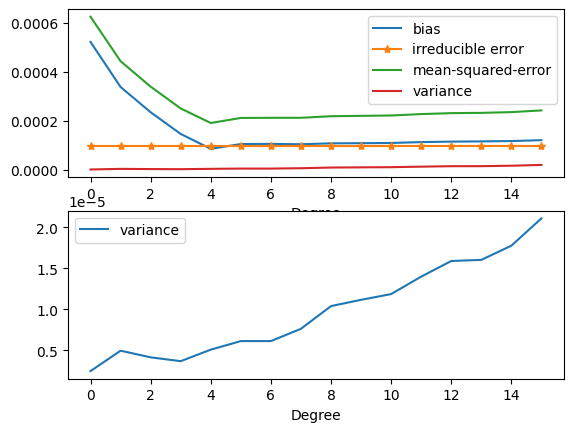

In [75]:
plt.subplot(2, 1, 1)
plt.plot(list(range(0,16)), bias.values(), label = "bias")
plt.plot(list(range(0,16)), [irreducible_error]*16, marker="*", label="irreducible error")
plt.plot(list(range(0,16)), mse, label = "mean-squared-error")
plt.plot(list(range(0,16)), var.values(), label="variance")
plt.xlabel('Degree')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(list(range(0,16)), var.values(), label="variance")
plt.xlabel('Degree')
plt.legend()

# Question 4

In [76]:
def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3

# part (a) - randomly generating 500 data points

In [79]:
np.random.seed(1)
x = np.random.uniform(0, 1, 500)
y = f(x) + np.random.normal(0, 0.01, 500)
df = pd.DataFrame({"x": x,"y": y})
df

,x,y
0,0.417022,0.023488
1,0.720324,0.027480
2,0.000114,-0.009339
3,0.302333,0.008121
4,0.146756,-0.011964
...,...,...
495,0.931861,0.014270
496,0.936868,0.004227
497,0.844330,0.015394
498,0.920207,-0.002717


# part (b) - Scatter plot of the data

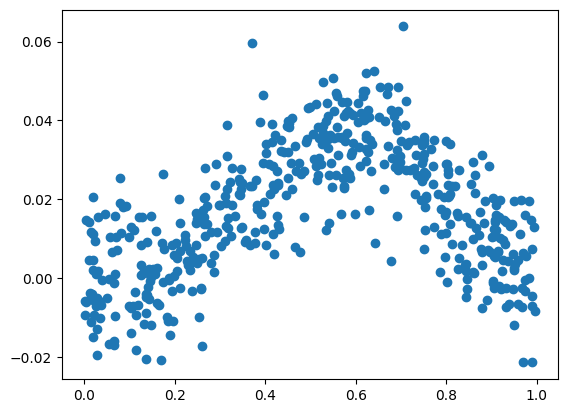

In [80]:
plt.scatter(df[["x"]], df[["y"]])

# part (c) - Computing LOOCV(Leave One Out Cross Validation) error of polynomial models of degree 1-7.

In [85]:
np.random.seed(123)
# generate data
x = np.random.uniform(0, 1, 500)
y = f(x) + np.random.normal(0, 0.01, 500)
df_4c = pd.DataFrame({"x": x,"y": y})
model_pred = []
# get the cross validation folds
loocv = LeaveOneOut()
X = df_4c[["x"]]
Y = df_4c[["y"]]
loocv_error = {}
# looping through every fold
for i, (train_idx, val_idx) in enumerate(loocv.split(X)):
    # for each fold create an empty list
    loocv_error[i] = []
    # fitting polynomial regression on train indices obtained in each fold, and then predicting the value in validation index.
    for j in range(1, 8):
        # convert features into polynomial features
        model = PolynomialFeatures(degree=j)
        x_poly = model.fit_transform(X.loc[train_idx])
        # fit a linear regression model on transformed polynomial features
        linear_model = LinearRegression()
        linear_model.fit(x_poly, Y.loc[train_idx])
        x_val = model.transform(X.loc[val_idx])
        loocv_error[i].append((Y.loc[val_idx].values[0][0] - linear_model.predict(x_val)[0][0])**2)
# computing the mean cross validation error for each model of degree 1 - 7.
overall_validation_error_c = pd.DataFrame(loocv_error).T
overall_validation_error_c = [overall_validation_error_c[i].mean() for i in overall_validation_error_c.columns]
overall_validation_error_c

[0.00023872667496951678,
 0.0001261052649907361,
 0.00011087924643876159,
 0.00010574321537933448,
 0.00010460992336824835,
 0.0001046344423490015,
 0.00010500174446146732]

# part (d) - sampling data with different seed.

In [86]:
np.random.seed(12345)
# generate data
x = np.random.uniform(0, 1, 500)
y = f(x) + np.random.normal(0, 0.01, 500)
df_4d = pd.DataFrame({"x": x,"y": y})
model_pred = []
# get the cross validation folds
loocv = LeaveOneOut()
X = df_4d[["x"]]
Y = df_4d[["y"]]
loocv_error = {}
# looping through every fold
for i, (train_idx, val_idx) in enumerate(loocv.split(X)):
    # for each fold create an empty list
    loocv_error[i] = []
    # fitting polynomial regression on train indices obtained in each fold, and then predicting the value in validation index.
    for j in range(1, 8):
        # convert features into polynomial features
        model = PolynomialFeatures(degree=j)
        x_poly = model.fit_transform(X.loc[train_idx])
        # fit a linear regression model on transformed polynomial features
        linear_model = LinearRegression()
        linear_model.fit(x_poly, Y.loc[train_idx])
        x_val = model.transform(X.loc[val_idx])
        loocv_error[i].append((Y.loc[val_idx].values[0][0] - linear_model.predict(x_val)[0][0])**2)
# computing the mean cross validation error for each model of degree 1 - 7.
overall_validation_error = pd.DataFrame(loocv_error).T
overall_validation_error = [overall_validation_error[i].mean() for i in overall_validation_error.columns]
overall_validation_error

[0.00022114215496333624,
 0.00011371176055646526,
 0.00010057119012530983,
 9.740695636902114e-05,
 9.26890929957335e-05,
 9.300730908595378e-05,
 9.335757987940532e-05]

# part (e) - min overall validation error

In [87]:
np.argmin(overall_validation_error)

4

# part (f) - Fit $f_5(x)$ using least squares

In [89]:
import statsmodels.api as sm
model = PolynomialFeatures(degree=5)
x_poly = model.fit_transform(df_4d[["x"]])
ols_model = sm.OLS(df_4d[["y"]], x_poly)
results = ols_model.fit()

In [90]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     157.7
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          6.80e-100
Time:                        16:09:07   Log-Likelihood:                 1618.0
No. Observations:                 500   AIC:                            -3224.
Df Residuals:                     494   BIC:                            -3199.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0053      0.002     -2.130      0.0